In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
import numpy as np
import pandas as pd
import seaborn as sns
import mglearn
import mglearn.datasets

Набор данных диабета

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print("Ключи diabetes(): \n{}".format(diabetes.keys()))

Ключи diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
print("Форма массива data для набора diabetes: {}".format(diabetes.data.shape))

Форма массива data для набора diabetes: (442, 10)


In [11]:
print("Имена признаков:\n{}".format(diabetes.feature_names))

Имена признаков:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
import pandas as pd

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
print(diabetes_df.iloc[0])

age    0.038076
sex    0.050680
bmi    0.061696
bp     0.021872
s1    -0.044223
s2    -0.034821
s3    -0.043401
s4    -0.002592
s5     0.019907
s6    -0.017646
Name: 0, dtype: float64


C:\Users\berme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berme\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

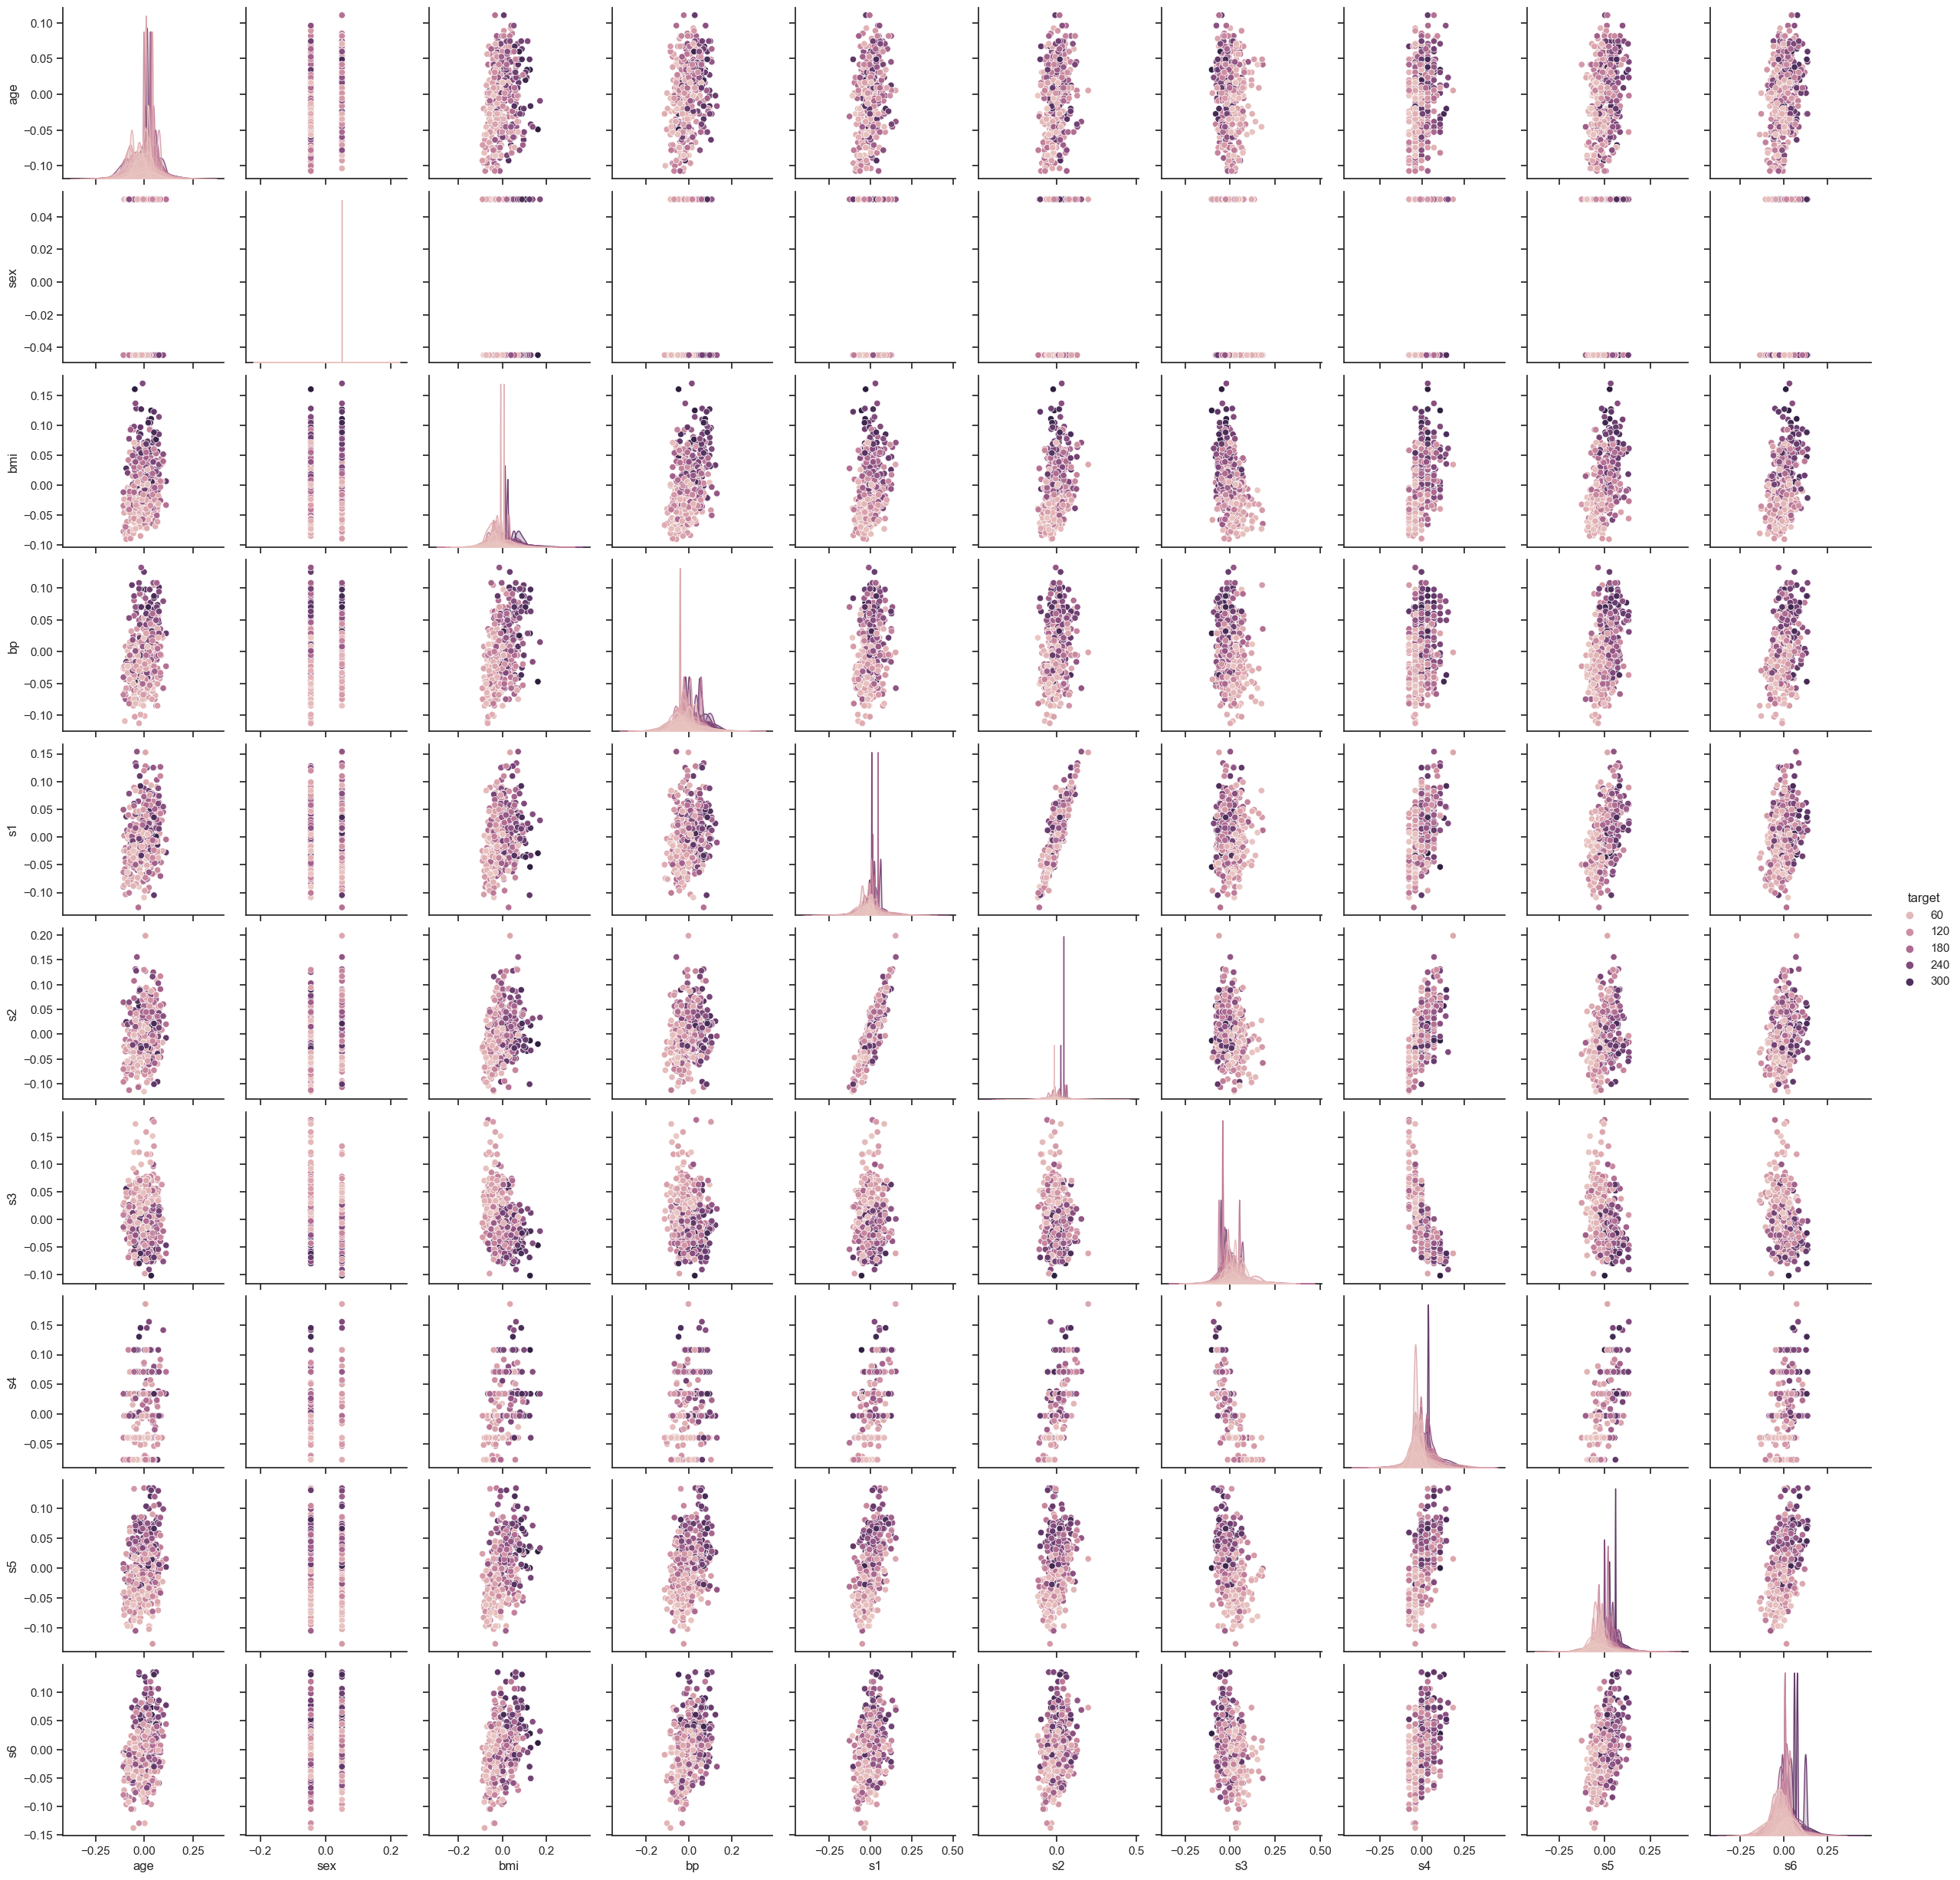

In [12]:

dia_data = load_diabetes()

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

#pairplot для создания диаграммы рассеяния
sns.set(style="ticks")
sns.pairplot(diabetes_df, hue='target')
plt.show()


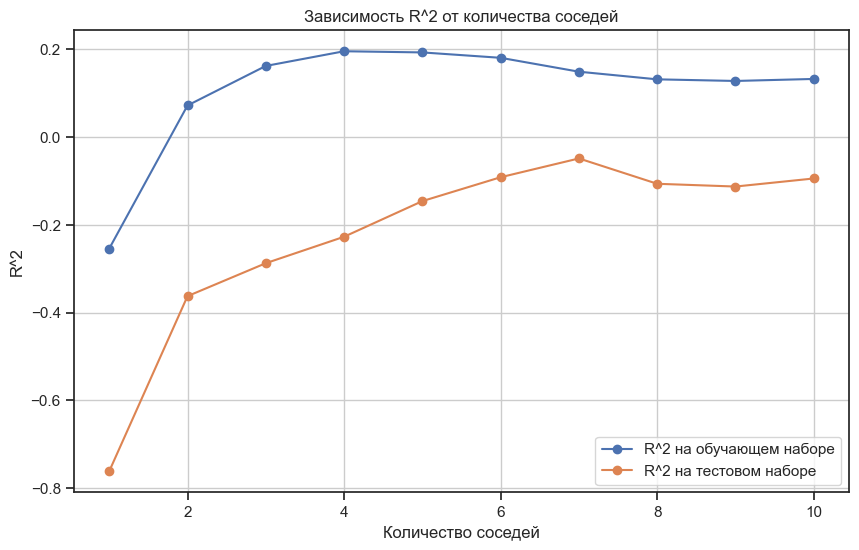

In [16]:
# Загрузите данные и разделите их на обучающий и тестовый наборы
X = dia_data.data[:, :2]
y = dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Создайте списки для хранения коэффициентов детерминации
training_r2 = []
test_r2 = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_r2.append(reg.score(X_train, y_train))
    test_r2.append(reg.score(X_test, y_test))  # Добавлено закрытие скобки здесь

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_r2, marker='o', label="R^2 на обучающем наборе")
plt.plot(neighbors_settings, test_r2, marker='o', label="R^2 на тестовом наборе")
plt.title("Зависимость R^2 от количества соседей")
plt.xlabel("Количество соседей")
plt.ylabel("R^2")
plt.legend()
plt.grid()
plt.show()

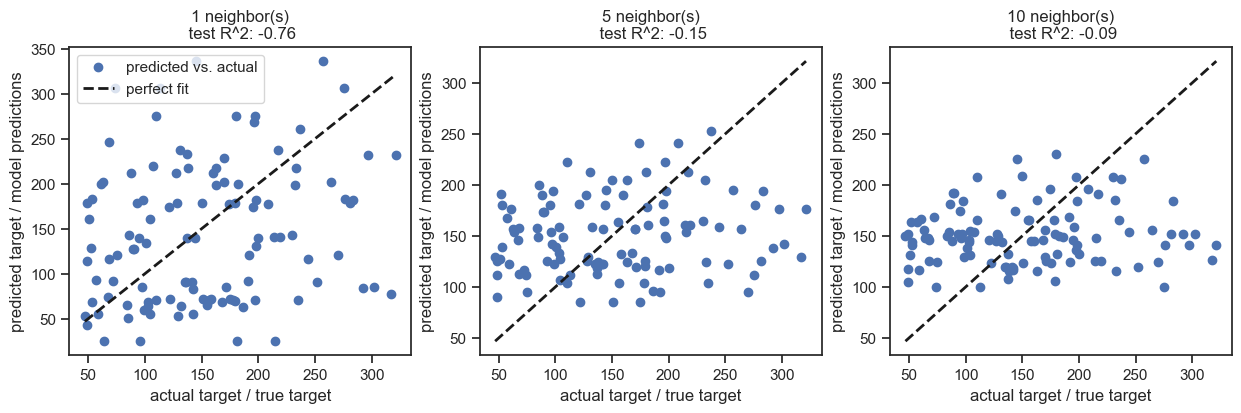

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 5, 10], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    # scatter
    ax.plot(y_test, predictions, 'o')
    # perfect fit
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

    ax.set_title(
        "{} neighbor(s)\n test R^2: {:.2f}".format(n_neighbors, reg.score(X_test, y_test))
    )
    ax.set_xlabel('actual target / true target')
    ax.set_ylabel('predicted target / model predictions')

axes[0].legend(['predicted vs. actual', 'perfect fit'], loc='best')
plt.show()

In [18]:
model = LinearRegression()

X_age = diabetes.data[:, 0].reshape(-1, 1)
y = diabetes.target

model.fit(X_age, y)

predictions = model.predict(X_age)
print(predictions)
print(len(predictions))

[163.71553045 151.56100659 178.07996773 125.04204544 153.77092002
 123.93708873 138.30152602 171.45022745 164.82048716 130.56682902
 122.83213202 160.4006603  157.08579016 153.77092002 165.92544388
 136.09161259 150.45604987 173.66014088 140.51143945 143.82630959
 137.1965693  126.14700216 126.14700216 165.92544388 132.77674244
 131.67178573 119.51726187 144.9312663  168.1353573  172.55518416
 133.88169916 144.9312663  162.61057373 161.50561702 157.08579016
 167.03040059 155.98083345 149.35109316 151.56100659 151.56100659
 153.77092002 121.7271753  133.88169916 158.19074688 165.92544388
 160.4006603  134.98665587 128.35691559 172.55518416 139.40648273
 162.61057373 170.34527073 136.09161259 149.35109316 137.1965693
 139.40648273 139.40648273 143.82630959 164.82048716 171.45022745
 130.56682902 139.40648273 143.82630959 141.61639616 172.55518416
 138.30152602 149.35109316 164.82048716 163.71553045 157.08579016
 151.56100659 151.56100659 171.45022745 155.98083345 155.98083345
 149.351093

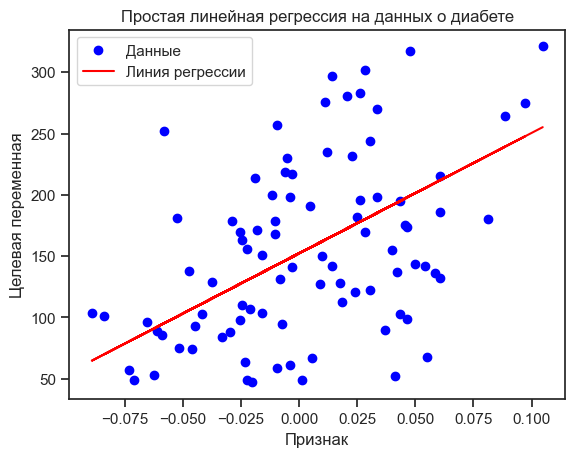

In [19]:
X = diabetes.data[:, np.newaxis, 2]  
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, label='Данные', color='blue')
plt.plot(X_test, y_pred, label='Линия регрессии', color='red')
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')
plt.title('Простая линейная регрессия на данных о диабете')
plt.legend()
plt.show()

In [26]:
X = dia_data.data
y = dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Обучите модель Ridge
ridge = Ridge().fit(X_train, y_train)
r_pred_y = ridge.predict(X_test)

# Вычислите среднеквадратичную ошибку (MSE)
r_mse = mean_squared_error(y_test, r_pred_y)

# Вывод результатов
print("Ridge Regression Results:")
print("Mean Squared Error (MSE): {:.2f}".format(r_mse))
print("Accuracy on the trained dataset: {:.2f}".format(ridge.score(X_train, y_train)))
print("Accuracy on the tested dataset: {:.2f}".format(ridge.score(X_test, y_test)))

Ridge Regression Results:
Mean Squared Error (MSE): 3192.32
Accuracy on the trained dataset: 0.46
Accuracy on the tested dataset: 0.36


In [32]:
def evaluate_ridge_regression(alpha, X_train, y_train, X_test, y_test):
    # Обучите модель Ridge с заданным alpha
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    r_pred_y = ridge.predict(X_test)
    
    # Вычислите среднеквадратичную ошибку (MSE)
    r_mse = mean_squared_error(y_test, r_pred_y)
    
    # Вывод результатов
    print("Ridge Regression Results (alpha={}):".format(alpha))
    print("Mean Squared Error (MSE): {:.2f}".format(r_mse))
    print("Accuracy on the trained dataset: {:.2f}".format(ridge.score(X_train, y_train)))
    print("Accuracy on the tested dataset: {:.2f}".format(ridge.score(X_test, y_test)))
    print("\n")

# Загрузите данные и разделите их на обучающий и тестовый наборы
X = dia_data.data
y = dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Оцените Ridge регрессию с разными значениями alpha
alphas = [1.0, 10.0, 100.0]  # Здесь вы можете указать другие значения alpha
for alpha in alphas:
    evaluate_ridge_regression(alpha, X_train, y_train, X_test, y_test)

Ridge Regression Results (alpha=1.0):
Mean Squared Error (MSE): 3192.32
Accuracy on the trained dataset: 0.46
Accuracy on the tested dataset: 0.36


Ridge Regression Results (alpha=10.0):
Mean Squared Error (MSE): 4252.86
Accuracy on the trained dataset: 0.17
Accuracy on the tested dataset: 0.14


Ridge Regression Results (alpha=100.0):
Mean Squared Error (MSE): 4865.76
Accuracy on the trained dataset: 0.02
Accuracy on the tested dataset: 0.02




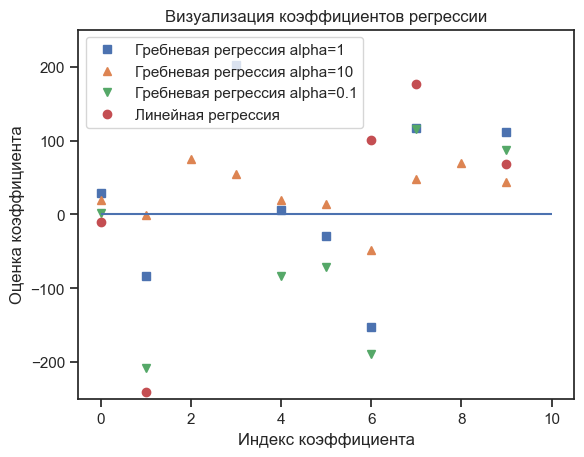

In [33]:
X = dia_data.data
y = dia_data.target

ridge1 = Ridge(alpha=1)
ridge10 = Ridge(alpha=10)
ridge01 = Ridge(alpha=0.1)
lr = LinearRegression()

ridge1.fit(X, y)
ridge10.fit(X, y)
ridge01.fit(X, y)
lr.fit(X, y)

plt.plot(ridge1.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-250, 250)
plt.legend()
plt.title("Визуализация коэффициентов регрессии")
plt.show()

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso().fit(X_train, y_train)

lasso_pred_y = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred_y)
print('Mean Squared Error: {:.2f}'.format(lasso_mse))

print('Accuracy on the trained dataset: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Accuracy on the tested dataset: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of used features: {}'.format(np.sum(lasso.coef_ != 0)))


Mean Squared Error: 3583.41
Accuracy on the trained dataset: 0.41
Accuracy on the tested dataset: 0.28
Number of used features: 2


Mean Squared Error: 3180.48
Amount of Used Features: 10
